<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/SOLUCION-DE-PRACTICAS-DE-APRENDIZAJE-AUTOMATICO-I/blob/main/Soluci%C3%B3n_Pr%C3%A1ctica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA N°4: ALGORITMOS DE CLUSTERING**

*Objetivo: Comprender el funcionamiento de los algoritmos de clustering (k-means, clustering jerárquico aglomerativo, DBSCAN y mean shift).*

In [ ]:
#Importamos las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### **EJERCICIO N°1:**

Prueba el método de k-means sobre (las dos primeras columnas de) algún dataset con
inicialización aleatoria y con la versión mejorada k-means ++, para el número k que consideres
adecuado. Muestra gráficamente el resultado. Aplica el método del codo para elegir el número
k que funcione mejor.

In [6]:
#Cargar dataset
data = load_iris()
X = data.data[:, :2]   # solo las dos primeras columnas

In [7]:
#Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Método del codo para elegir K
inertias = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

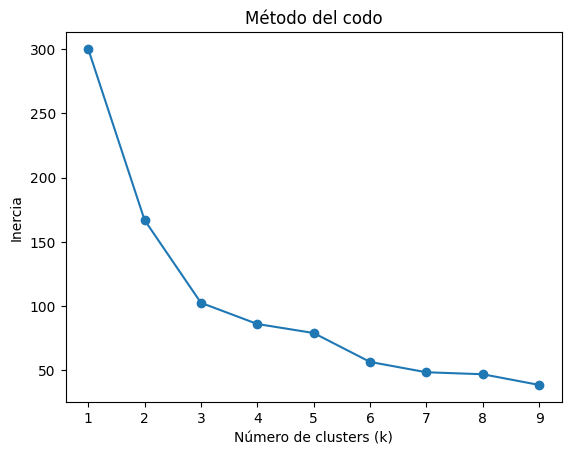

In [9]:
#Visualizamos
plt.plot(K_range, inertias, marker="o")
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.show()

**Elección del mejor *k*:**

Al visualizar el gráfico del método del codo, el mejor *k* para nuestro conjunto de datos "*Iris*", es ***k* = 3.**

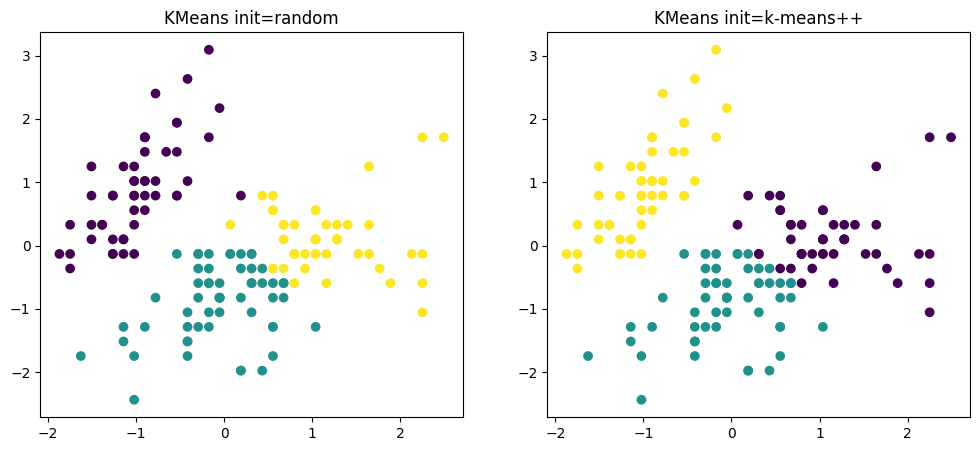

In [10]:
#Comparar inicialización aleatoria vs k-Means++
k = 3

km_random = KMeans(n_clusters=k, init="random", random_state=42).fit(X_scaled)
km_plus   = KMeans(n_clusters=k, init="k-means++", random_state=42).fit(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=km_random.labels_)
plt.title("KMeans init=random")

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=km_plus.labels_)
plt.title("KMeans init=k-means++")

plt.show()

**Analisis:**

Al aplicar ***K-Means*** sobre las dos primeras características del dataset Iris, se observa una diferencia clara entre la ***inicialización aleatoria*** (init="random") y la ***inicialización mejorada*** (init="k-means++").

* Con ***inicialización aleatoria***, los centroides iniciales se colocan al azar, lo que provoca que el algoritmo genere fronteras menos estables y en algunos casos agrupaciones menos coherentes con la estructura real de los datos. Esto se ve en la gráfica porque algunos puntos quedan asignados a clusters que no parecen tan compactos o separados.

* Con ***K-Means++***, los centroides iniciales se seleccionan de forma más inteligente, dispersándolos en zonas representativas del espacio de datos. Como resultado, los clusters obtenidos son más estables, más compactos y mejor alineados con la verdadera estructura del dataset. En la gráfica se observa una separación más limpia entre los tres grupos.

Finalmente, se concluye que ***K-Means++*** proporciona una mejor solución y evita quedar atrapado en mínimos locales, por lo que suele ser la opción recomendable frente a la inicialización aleatoria.

### **EJERCICIO N°2:**

Prueba el método de clustering jerárquico aglomerativo (AgglomerativeClustering en scikitlearn) sobre el dataset anterior con los cuatro tipos de enlace disponibles: “single”, “complete”,
“average” y “ward” y con las distancias vistas en el tema 2: “euclidean”, “manhattan” y “cosine”
(el tipo de enlace “ward” solo está disponible para la distancia euclídea). Muestra por pantalla
gráficamente los clústeres que se obtienen en cada uno de ellos y comenta cuál de las opciones
crees que da el mejor resultado. Puedes visualizar uno de los dendogramas para obtener el
número de clústeres (si no lo sabes de antemano).

In [ ]:
#Importamos las librerias

In [11]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
linkages = ["single", "complete", "average", "ward"]
distances = ["euclidean", "manhattan", "cosine"]

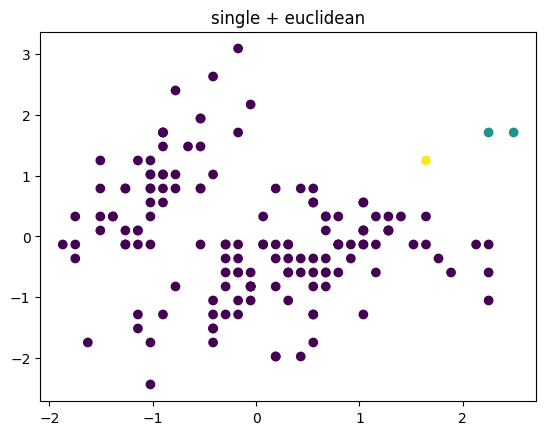

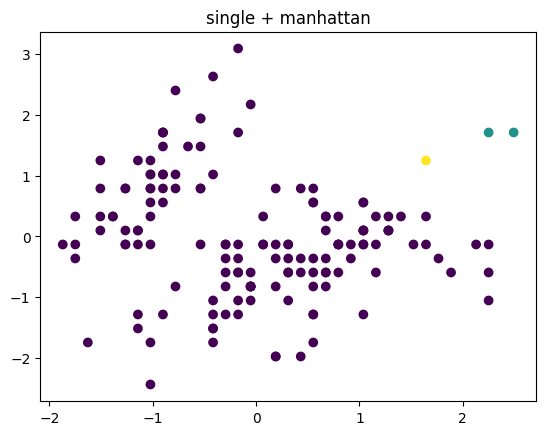

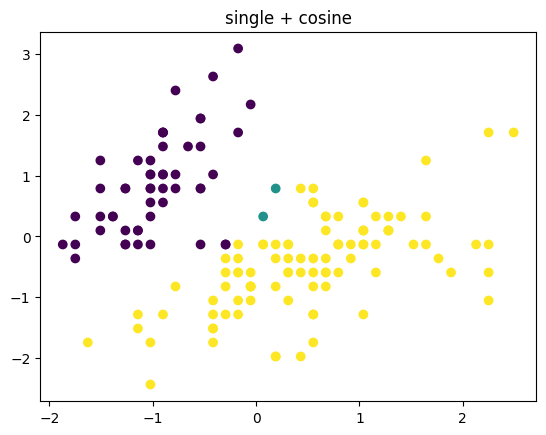

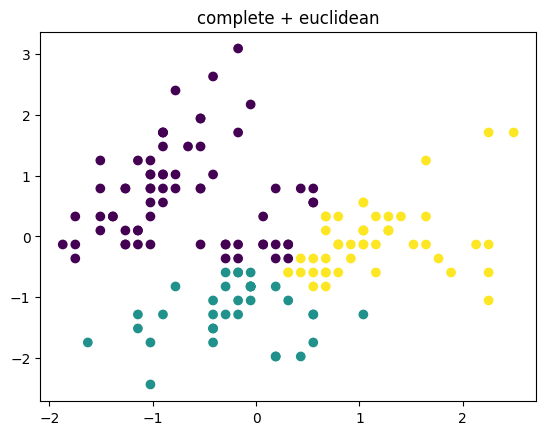

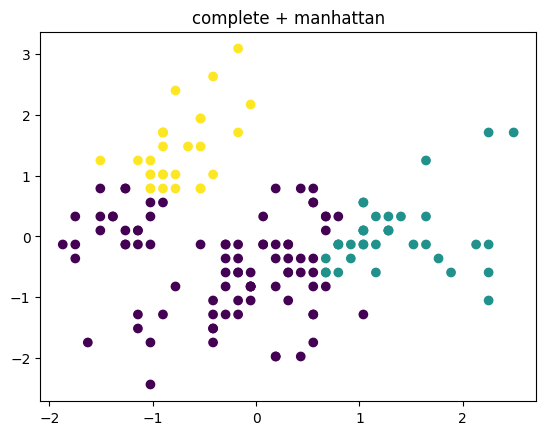

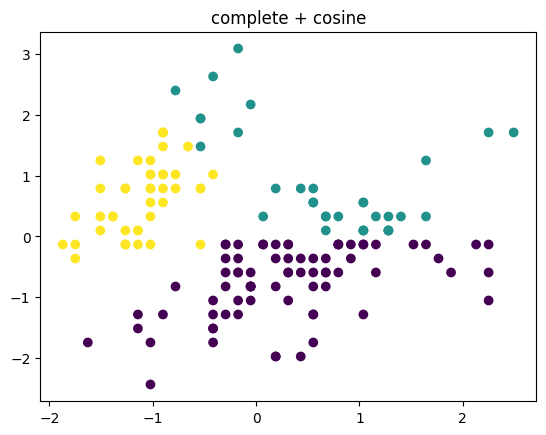

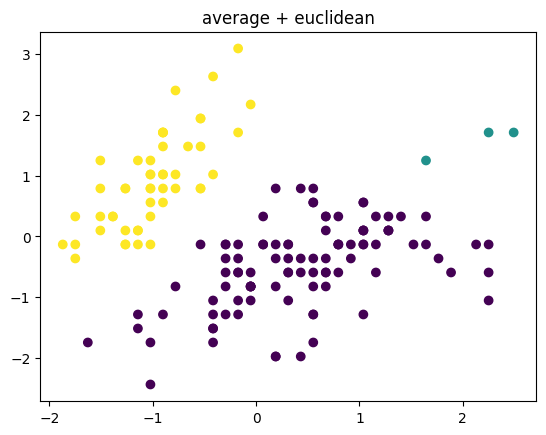

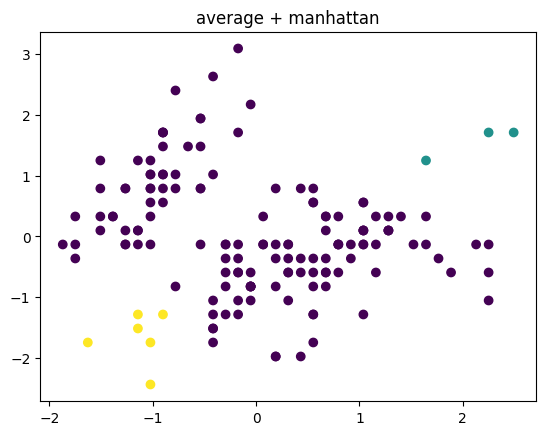

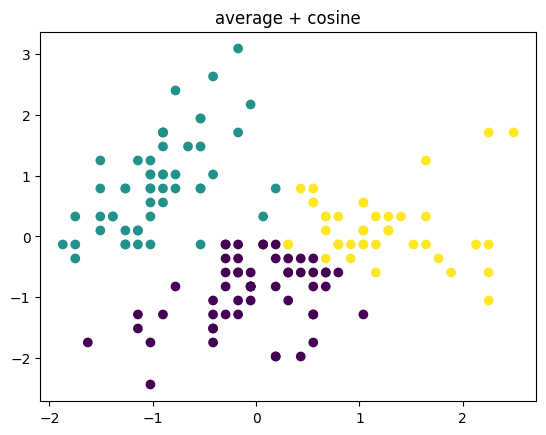

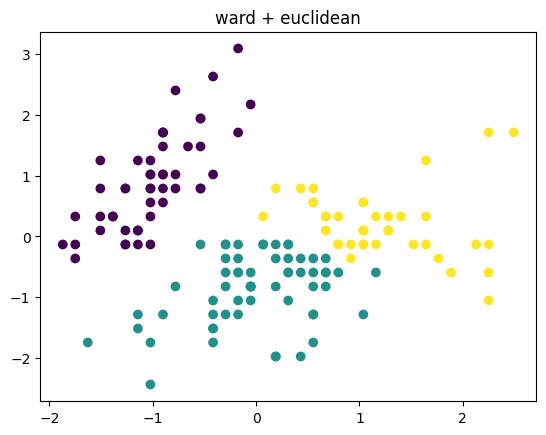

In [13]:
# Para Ward solo euclidean
for link in linkages:
    for dist in distances:
        if link == "ward" and dist != "euclidean":
            continue

        model = AgglomerativeClustering(
            n_clusters=3,
            linkage=link,
            metric=dist
        )
        labels = model.fit_predict(X_scaled)

        plt.figure()
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
        plt.title(f"{link} + {dist}")
        plt.show()

**Analisis:**

Al aplicar el clustering jerárquico aglomerativo sobre las dos primeras variables del dataset Iris, se observan diferencias claras entre los tipos de enlace y las distancias utilizadas:

* ***Single linkage*** produce el peor resultado en todas las distancias, debido al “efecto chaining”, que forma un único cluster grande y apenas separa grupos.

* ***Complete linkage*** genera clusters más compactos y ofrece resultados estables, especialmente con distancia euclídea.

* ***Average linkage*** tiene un comportamiento intermedio: mejora respecto a single, pero no separa tan bien como complete o ward.

* ***Ward (euclidean)*** es el método que mejor identifica la estructura natural de 3 clusters del dataset Iris, generando una separación clara y consistente.

Finalmente, se concluye que ***Ward + Euclidean*** es la combinación que da el mejor resultado para este dataset.


### **EJERCICIO N°3:**

Construye tres datasets con 6 puntos para los que se obtengan los siguientes dendogramas
considerando como enlace la distancia del mínimo (single), máximo (complete) y media
(average) respectivamente. No hace falta que las alturas obtenidas sean exactamente las
mismas, pero sí que los puntos se unan en el orden correcto.

**a). DENDOGRAMA N° 1 (enlace *"single"* )**

In [19]:
#Dataset para SINGLE
X_single = np.array([
    [0.0, 0.0],   # P1
    [0.1, 0.1],   # P6
    [0.2, 0.2],   # P2
    [0.3, 0.3],   # P5
    [5.0, 0.0],   # P3
    [5.1, 0.1],   # P4
])

In [15]:
labels_single = ["P1", "P6", "P2", "P5", "P3", "P4"]

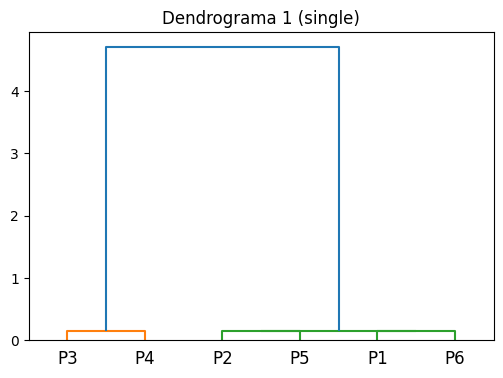

In [17]:
Z_single = linkage(X_single, method="single")
plt.figure(figsize=(6,4))
dendrogram(Z_single, labels=labels_single)
plt.title("Dendrograma 1 (single)")
plt.show()

**b). DENDOGRAMA N°2 (enlace *"complete"* )**

In [18]:
#Dataset para COMPLETE
X_complete = np.array([
    [0.0, 0.0],   # P1
    [0.2, 0.0],   # P2
    [0.1, 1.0],   # P3
    [8.0, 8.0],   # P4  (muy alejado)
    [5.0, 0.0],   # P5
    [5.2, 0.2],   # P6
])


In [20]:
labels_complete = ["P1","P2","P3","P4","P5","P6"]

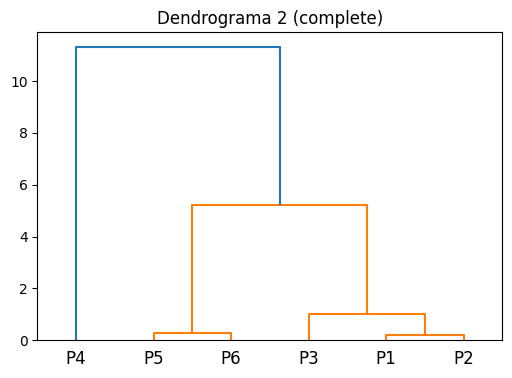

In [21]:
Z_complete = linkage(X_complete, method="complete")
plt.figure(figsize=(6,4))
dendrogram(Z_complete, labels=labels_complete)
plt.title("Dendrograma 2 (complete)")
plt.show()

**c). DENDOGRAMA N°3 (enlace *"average"* )**

In [22]:
# Dataset para AVERAGE
X_avg = np.array([
    [0.0, 0.0],    # P1
    [0.2, 0.0],    # P2
    [5.0, 0.0],    # P3
    [5.2, 0.1],    # P4
    [5.1, 0.5],    # P5
    [0.1, 1.0],    # P6
])

In [23]:
labels_avg = ["P1","P2","P3","P4","P5","P6"]

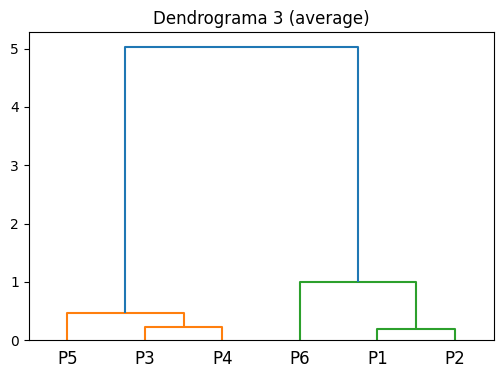

In [24]:
Z_avg = linkage(X_avg, method="average")
plt.figure(figsize=(6,4))
dendrogram(Z_avg, labels=labels_avg)
plt.title("Dendrograma 3 (average)")
plt.show()

**Analisis:**

Se concluye que los tres dendogramas, reflejan de forma clara como van cambiando su estructura de agrupamiento según el tipo de enlace utilizado. Se detalla lo siguiente para cada una:
* **Single:** Forma cadenas largas y clusters poco compactos.

* **Complete:** Genera clusters bien separados y compactos.

* **Average:** Produce un resultado equilibrado, fusionando grupos de forma progresiva.

### **EJERCICIO N°4:**

Dada la siguiente matriz de enlace o linkage (correspondiente al dendograma 1 del ejercicio
anterior), explica con palabras lo que significan las primeras 3 filas.

[[1, 4, 1.55241747, 2],

[5, 6, 1.67630546, 3],

[0, 7, 1.80277564, 4],

[2, 3, 3.04138127, 2],

[8, 9, 4.42831797, 6]]




---


**FILA 1:**

[1, 4, 1.55241747, 2]

Se interpreta lo siguiente:
* Se unen los elementos 1 y 4.
* La distancia en la que se unen es de 1.55.
* El nuevo cluster contien 2 puntos.

Se observa que se unen primero formando un cluster pequeño.


---
**FILA 2:**

[5, 6, 1.67630546, 3]

Se interpreta lo siguiente:
* Se unen los elementos 5 y 6.
* La distancia en la que se unen es de 1.67.
* El nuevo cluster contien 3 puntos.

Se observa que uno de los indices (5 o 6) no es un punto original, sino un cluster creado previamente.


---
**FILA 3:**

[0, 7, 1.80277564, 4]

Se interpreta lo siguiente:
* Se unen los elementos 0 y 7.
* La distancia en la que se unen es de 1.80.
* El nuevo cluster contien 4 puntos.

Se observa que el punto 0 se fusiona con el cluster anterior, formando un grupo de 4 elementos.

Se concluye que lo antes mencionado describe el orden en que se construye el dendrograma: primero agrupar puntos muy cercanos, y luego ir juntando esos grupos progresivamente.

### **EJERCICIO N°5:**

Prueba el algoritmo DBSCAN sobre el dataset de los ejercicios 1 y 2 con la distancia euclídea,
mostrando gráficamente los clústeres obtenidos. Modifica los parámetros eps y min_samples
hasta lograr el resultado que consideres mejor. Para determinar eps, puedes utilizar las ideas
vistas en el cuaderno de Jupyter de teoría: tema3_03_DBSCAN.ipybn. Prueba con otras
distancias (diferentes de la euclídea), muestra gráficamente los clústeres y comenta cuáles son
los resultados obtenidos

In [27]:
from sklearn.cluster import DBSCAN

a). Aplicando DBSCAN con distancia euclída

In [28]:
# Dataset X_scaled ya obtenido en ejercicios anteriores

def plot_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
    labels = db.fit_predict(X_scaled)

    plt.figure(figsize=(5,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis")
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
    plt.show()

    print("Clusters únicos:", np.unique(labels))
    print("Ruido (label = -1):", np.sum(labels == -1))

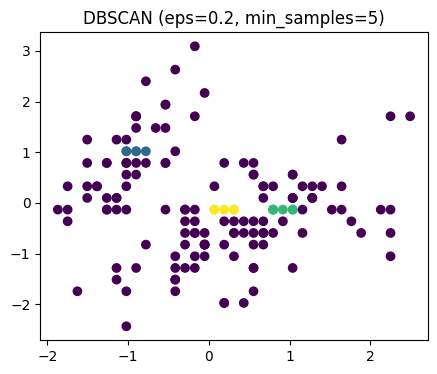

Clusters únicos: [-1  0  1  2]
Ruido (label = -1): 134


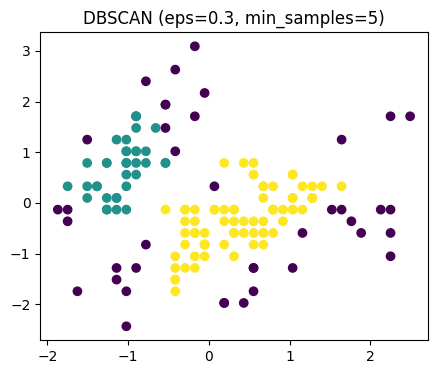

Clusters únicos: [-1  0  1]
Ruido (label = -1): 40


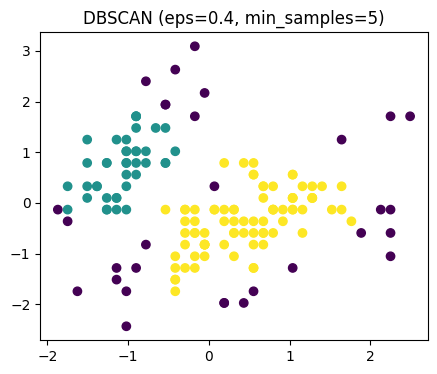

Clusters únicos: [-1  0  1]
Ruido (label = -1): 30


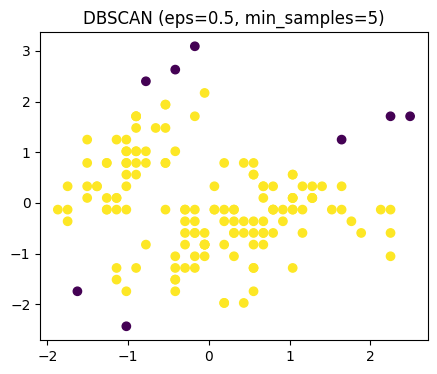

Clusters únicos: [-1  0]
Ruido (label = -1): 8


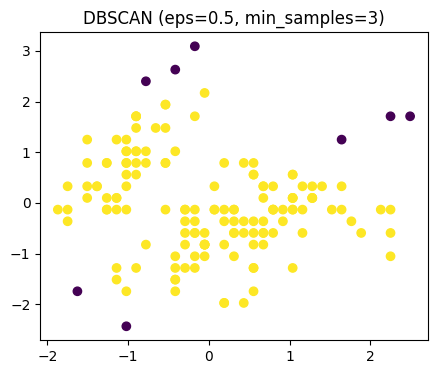

Clusters únicos: [-1  0]
Ruido (label = -1): 8


In [31]:
# Algoritmo DBSCAN
plot_dbscan(eps=0.2, min_samples=5)
plot_dbscan(eps=0.3, min_samples=5)
plot_dbscan(eps=0.4, min_samples=5)
plot_dbscan(eps=0.5, min_samples=5)
plot_dbscan(eps=0.5, min_samples=3)

**Analisis:**

Con los resultados obtenidos se concluye que DBSCAN no es el mejor algoritmo para el conjunto de datos que se esta trabajando, porque no tiene forma de densidad claramente separada.

Se interpreta lo siguiente:
* Valores muy pequeños de eps → casi todo ruido.

* Valores intermedios como 0.3–0.4 → mejor estructura, con dos clusters diferenciados.

* Valores grandes (eps = 0.5) → un único cluster que pierde la forma real del dataset.

* Cambiar min_samples modifica la densidad requerida, pero no soluciona que DBSCAN no recupere los 3 grupos reales del Iris con solo dos variables.


b). Eligiendo eps visualmente (gráfico k-distance)

In [32]:
from sklearn.neighbors import NearestNeighbors

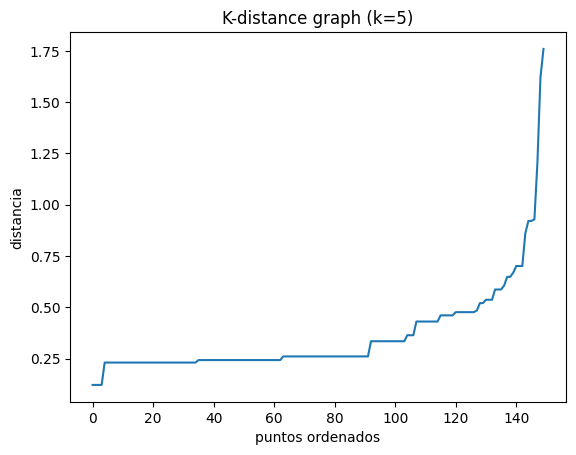

In [33]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])  # distancia al 5to vecino
plt.plot(distances)
plt.title("K-distance graph (k=5)")
plt.ylabel("distancia")
plt.xlabel("puntos ordenados")
plt.show()

**Analisis:**

El valor óptimo de eps debe estar alrededor de 0.35–0.40, porque es donde se encuentra el “codo” del gráfico. Estos valores permiten que DBSCAN capture la densidad de los clusters sin incluir puntos aislados o ruido.

Este resultado coincide con las pruebas anteriores :

eps = 0.3 aún deja mucho ruido

eps = 0.4 da una estructura más coherente

eps ≥ 0.5 ya agrupa todo en un solo cluster

c). Probando DBSCAN con otras distancias (manhattan y cosine)

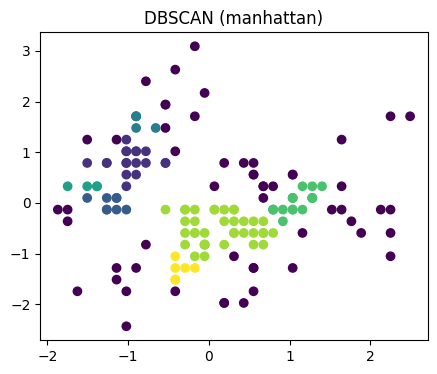

Clusters únicos: [-1  0  1  2  3  4  5  6]
Ruido (-1): 55


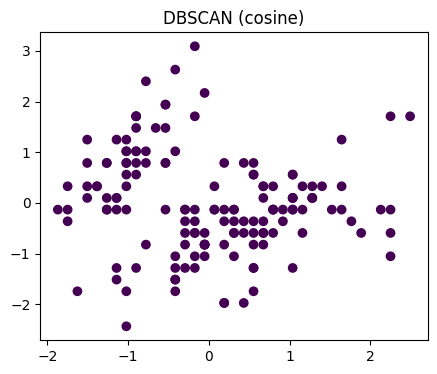

Clusters únicos: [0]
Ruido (-1): 0


In [34]:
def plot_dbscan_metric(metric, eps=0.4, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = db.fit_predict(X_scaled)

    plt.figure(figsize=(5,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis")
    plt.title(f"DBSCAN ({metric})")
    plt.show()

    print("Clusters únicos:", np.unique(labels))
    print("Ruido (-1):", np.sum(labels == -1))

plot_dbscan_metric("manhattan", eps=0.3, min_samples=5)
plot_dbscan_metric("cosine", eps=0.1, min_samples=5)

**Analisis:**

Se concluye que DBSCAN solo funciona de forma aceptable con la distancia euclidea, referente al conjunto de datos que se esta trabajando, pero incluso con ello no se logra recuperar la estructura de 3 clases reales del Iris en 2D.


---



* Euclidean: La mejor métrica para este dataset, permite observar 2 clusters razonables con eps ~ 0.35–0.40.

* Manhattan: Genera demasiados clusters pequeños y mucho ruido; no representa bien la estructura.

* Cosine: Agrupa todo en un único cluster; no distingue densidades reales.

**EJERCICIO N°6:**

Prueba el algoritmo mean shift sobre el dataset anterior, mostrando gráficamente los clústeres
obtenidos. Modifica el parámetro bandwidth hasta lograr el resultado que consideres mejor.

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [37]:
# Usamos el Dataset: X_scaled de ejercicios anteriores

# Estimo bandwidth automáticamente
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
bandwidth

np.float64(0.9661043669622427)

In [38]:
# Probamos Mean Shift con distintos bandwidth

def plot_meanshift(bandwidth):
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X_scaled)
    labels = ms.labels_

    plt.figure(figsize=(5,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis")
    plt.title(f"Mean Shift (bandwidth={bandwidth:.2f})")
    plt.show()

    print("Clusters únicos:", np.unique(labels))

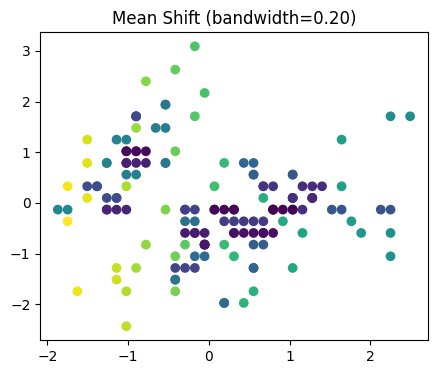

Clusters únicos: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


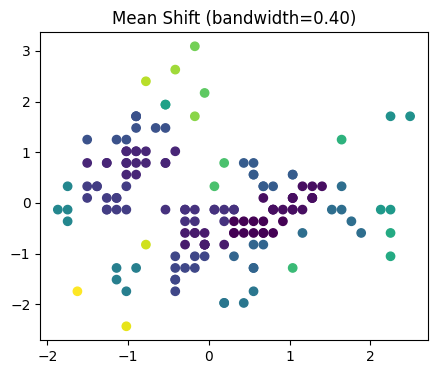

Clusters únicos: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


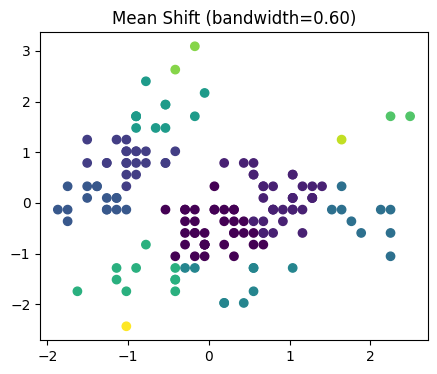

Clusters únicos: [ 0  1  2  3  4  5  6  7  8  9 10 11]


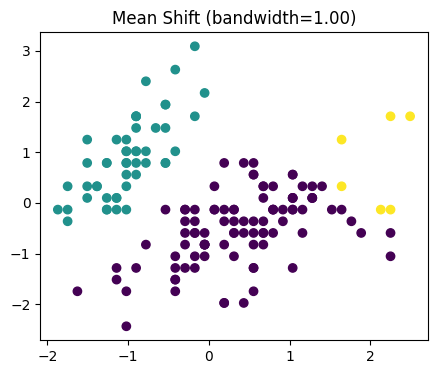

Clusters únicos: [0 1 2]


In [39]:
# Efectuando las pruebas
plot_meanshift(bandwidth=0.2)
plot_meanshift(bandwidth=0.4)
plot_meanshift(bandwidth=0.6)
plot_meanshift(bandwidth=1.0)

**Analisis:**

Se observa que Mean Shift, captura zonas de densidad, pero no recupera exactamente los 3 clusters reales del Iris cuando se usan solo 2 caracteristicas.

Asimismo, se puede verficar que bandwidth (0.4–0.5) ofrece el mejor equilibrio, formando clusters coherentes sin fragmentación excesiva

**EJERCICIO N° 7:**

Dados los siguientes datasets (los colores indican la partición original, que se supone conocida),
indica para cada uno de ellos qué algoritmo o algoritmos de clustering (k-means, clústering
jerárquico aglomerativo con los distintos tipos de enlace, DBSCAN o mean shift) crees que
producirán mejores resultados.

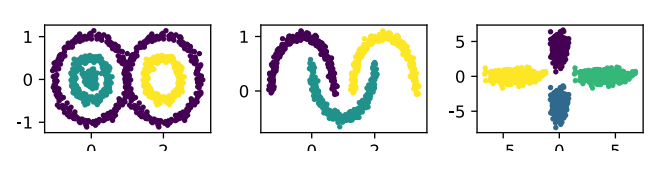

**Dataset 1: Dos circulos concéntricos y un cluster separado**

Los clusters tienen forma circular/no convexa, y K-Means o Ward siempre buscan fronteras lineales/convexas, por lo que dividirían incorrectamente los anillos. DBSCAN y Mean Shift capturan bien densidades y formas arbitrarias.

**Dataset 2: Dos lunas crecientes**

La forma es claramente no lineal, por lo que los métodos basados en centroides o clusters convexos fallan. DBSCAN detecta perfectamente las dos lunas y Mean Shift también.

**Dataset 3: 4 clusters separados y compactos (tipo blobs)**

K-Means y Ward funcionan muy bien cuando los clusters son aproximadamente esféricos y bien separados. Mean Shift también lo haría. DBSCAN podría separar los clusters, pero no es necesario un método basado en densidad para este caso.


**EJERCICIO N°8:**

Completa los * en las siguientes matrices de enlace con valores que sean coherentes:


---


Matriz 1

[[0 , 1 , 1 ,* ],

 [2 , * , *, 2 ],

[4, 5, * , 3],

 [6, 7, 4.1, *]]



---


Matriz 2

[[1, * , *, 2],

 [3, *, 2.9, 3 ],

 [*,* , 4 , 2 ],

 [*, 7 , *, 5]]

In [43]:
# MATRIZ 1

matriz1 = np.array([
    [0, 1, 1.0, 2],
    [2, 3, 1.5, 2],
    [4, 5, 2.5, 3],
    [6, 7, 4.1, 5]
])

print("MATRIZ 1:")
print(matriz1)

MATRIZ 1:
[[0.  1.  1.  2. ]
 [2.  3.  1.5 2. ]
 [4.  5.  2.5 3. ]
 [6.  7.  4.1 5. ]]


In [41]:
# MATRIZ 2

matriz2 = np.array([
    [1, 2, 1.0, 2],
    [3, 5, 2.9, 3],
    [0, 4, 4.0, 2],
    [6, 7, 4.5, 5]
])

print("MATRIZ 2:")
print(matriz2)

MATRIZ 2:
[[1.  2.  1.  2. ]
 [3.  5.  2.9 3. ]
 [0.  4.  4.  2. ]
 [6.  7.  4.5 5. ]]
